In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
lfc = pd.read_csv('../data/standardized_data/result_logfc_matrix_2020_08_27.csv')

In [3]:
lfc.head()

,Rv_ID,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,Rv3005c_KO_day32_vs_dejesus_H37Rv_day32,Rv3594_KO_vs_Rubin_FLUTE_WT,Rv3684_KO_vs_CB_WT,Rv3717_KO_vs_Rubin_FLUTE_WT,...,zhang_AA_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_DETA-NO_pH_7.0_vs_zhang_pH_7.0_no_NO_control,zhang_Fe_1.5mM_vs_zhang_Fe_450uM,zhang_Trp_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_Tyloxapol_pH_6.5_vs_zhang_Tyloxapol_pH_4.5,zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library
0,Rv0001,-0.41,0.01,0.00,0.00,0.00,3.12,-0.06,0.00,-0.06,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Rv0002,3.28,2.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Rv0003,-0.03,-0.08,0.03,-1.20,0.39,3.83,0.31,0.17,-0.62,...,-2.93,-0.31,1.09,-2.13,0.51,0.41,1.30,-0.49,-1.26,-2.25
3,Rv0004,-3.81,-3.39,-2.60,-6.83,1.54,0.00,1.79,1.08,4.91,...,-3.56,0.00,1.96,-3.56,0.00,0.00,0.00,0.70,-2.62,-2.62
4,Rv0005,-0.22,0.14,0.13,-0.08,0.27,-2.38,0.70,-0.71,-0.37,...,-1.47,-0.89,-2.36,-1.89,2.90,2.20,-4.05,0.30,0.69,-3.55


In [4]:
## REMOVE ESSENTIALS!
mbio = pd.read_excel("../data/annotations/DeJesus_mbio.xlsx", header=1)
mbio.head()

,ORF ID,Name,Description,Number of TA Sites,Number of Permissive (P) Sites,Number of Non-Permissive (NP) Sites,Number of Sites Belonging to Essential State,Number of Sites Belonging to Growth-Defect State,Number of Sites Belonging to Non-Essential State,Number of Sites Belonging to Growth-Advantage State,Fraction of Sites with Insertions,Mean Normalized Read-Count At Non-Zero Sites,Final Call
0,Rv0001,dnaA,Chromosomal replication initiator protein DnaA,32,29,3,31,0,1,0,0.125000,45.000000,ES
1,Rv0002,dnaN,DNA polymerase III (beta chain) DnaN (DNA nucl...,31,27,4,31,0,0,0,0.032258,1.000000,ES
2,Rv0003,recF,DNA replication and repair protein RecF (singl...,35,32,3,0,0,35,0,0.857143,38.033333,NE
3,Rv0004,-,hypothetical protein,8,8,0,0,0,8,0,0.375000,144.000000,NE
4,Rv0005,gyrB,DNA gyrase (subunit B) GyrB (DNA topoisomerase...,40,36,4,39,0,1,0,0.025000,26.000000,ES


In [5]:
print(lfc.shape)
lfc = pd.merge(lfc, mbio[['ORF ID', 'Final Call']], how='left', left_on='Rv_ID', right_on='ORF ID')
print(lfc.shape)

(4055, 65)
(4055, 67)


In [8]:
lfc = lfc[lfc['Final Call'] != 'ES']
lfc = lfc.drop(columns = ['ORF ID', 'Final Call'])
print(lfc.shape)

(3594, 65)


In [9]:
lfc=lfc.dropna(axis=0)
lfc=lfc.T.reset_index()
lfc.columns=list(lfc.iloc[0,:])
lfc=lfc.iloc[1:,:]
lfc=lfc.rename(columns={'Rv_ID': 'Dataset'})
lfc=lfc.set_index('Dataset')

In [10]:
lfc.head()

,Rv0003,Rv0004,Rv0007,Rv0008c,Rv0009,Rv0010c,Rv0011c,Rv0012,Rv0016c,Rv0017c,...,Rv3911,Rv3912,Rv3914,Rv3916c,Rv3919c,Rv3920c,Rv3921c,Rv3922c,Rv3923c,Rv3924c
Dataset,,,,,,,,,,,,,,,,,,,,,
PE35_KO_vs_mbio_H37Rv,-0.03,-3.81,-0.44,-0.22,-0.13,-0.06,0.42,-0.24,0.09,-0.12,...,-0.18,0.26,0.11,0.55,0.01,0.06,1.98,-0.88,-0.32,0
PPE68_KO_vs_mbio_H37Rv,-0.08,-3.39,-0.14,-0,-0.12,0.07,0.56,-0.74,-0.25,-0.19,...,0.07,0.31,0.53,1.11,0.29,0,1.92,-0.37,0.1,0
Rv0950c_KO_vs_CB_WT,0.03,-2.6,-0.47,0.43,-0.1,0.29,-1.6,0.29,-0.96,-0.65,...,-0.3,0.1,0.7,-0.15,0.63,0.26,0.25,-0.12,-1.75,0
Rv0954_KO_vs_RJ_WT,-1.2,-6.83,-1.21,-0.51,0.78,0.31,-6.75,-1.12,-4.57,-3.85,...,-0.38,0.36,-2.05,3.06,-1.56,-1.73,0.16,-0.82,3.01,0
Rv1096_KO_vs_CB_WT,0.39,1.54,-0.34,0.58,0.11,0.26,-1.98,-1.12,-0.84,-0.38,...,-0.17,0.12,1.55,-0.27,0.52,-0.05,0.87,0.47,0.28,0


In [11]:
value_cols=[col for col in lfc.columns if col!='Dataset']

In [12]:
from sklearn.decomposition import PCA
from plotnine import *

In [13]:
pca=PCA(3)
pca_results=pca.fit_transform(lfc[value_cols])
# print(pca_results)
explained_var = pca.explained_variance_ratio_
print(pca.explained_variance_ratio_)
pca_df=pd.DataFrame(pca_results, columns=['pca1', 'pca2', 'pca3'])
pca_df=pca_df.set_index(lfc.index)

[0.16968815 0.08489134 0.06650353]


In [14]:
lfc=lfc.merge(pca_df, left_index=True, right_index=True)

In [15]:
lfc

,Rv0003,Rv0004,Rv0007,Rv0008c,Rv0009,Rv0010c,Rv0011c,Rv0012,Rv0016c,Rv0017c,...,Rv3916c,Rv3919c,Rv3920c,Rv3921c,Rv3922c,Rv3923c,Rv3924c,pca1,pca2,pca3
Dataset,,,,,,,,,,,,,,,,,,,,,
PE35_KO_vs_mbio_H37Rv,-0.03,-3.81,-0.44,-0.22,-0.13,-0.06,0.42,-0.24,0.09,-0.12,...,0.55,0.01,0.06,1.98,-0.88,-0.32,0,-4.760095,-2.369996,-1.630707
PPE68_KO_vs_mbio_H37Rv,-0.08,-3.39,-0.14,-0,-0.12,0.07,0.56,-0.74,-0.25,-0.19,...,1.11,0.29,0,1.92,-0.37,0.1,0,-4.325169,-2.313324,-1.223063
Rv0950c_KO_vs_CB_WT,0.03,-2.6,-0.47,0.43,-0.1,0.29,-1.6,0.29,-0.96,-0.65,...,-0.15,0.63,0.26,0.25,-0.12,-1.75,0,-9.116154,0.404866,-1.930261
Rv0954_KO_vs_RJ_WT,-1.2,-6.83,-1.21,-0.51,0.78,0.31,-6.75,-1.12,-4.57,-3.85,...,3.06,-1.56,-1.73,0.16,-0.82,3.01,0,-11.774741,4.011509,-6.554429
Rv1096_KO_vs_CB_WT,0.39,1.54,-0.34,0.58,0.11,0.26,-1.98,-1.12,-0.84,-0.38,...,-0.27,0.52,-0.05,0.87,0.47,0.28,0,-8.635184,-2.633574,0.812886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,0.41,0,0,0.15,-0.24,-0.16,0,0.45,1.39,-1.39,...,0.91,0.73,1.7,0,-0.76,0,0,-6.047181,-8.812395,1.011661
zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,1.3,0,-0.9,-0.26,0.26,0.09,0,1.3,-2.29,6.59,...,-8.39,0.54,2.99,0,1.65,0,0,-10.719093,-32.728199,12.076852
zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,-0.49,0.7,3.05,0.44,1.99,1.58,0,-0.17,2.39,1.99,...,0.52,-1.56,0.75,0,-0.93,1.6,0,-0.084878,-16.324142,5.275078


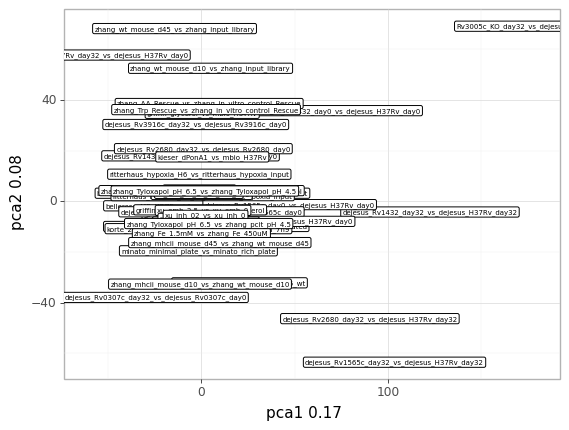

<ggplot: (8777359062513)>

In [16]:
(ggplot(lfc, aes(x='pca1', y='pca2')) 
 + geom_point() 
 + theme_light() 
 + geom_label(label=lfc.index, size=5, nudge_x=10)
 + xlab(f'pca1 {np.round(explained_var[0], 2)}') 
 + ylab(f'pca2 {np.round(explained_var[1], 2)}')
)

In [17]:
from sklearn.manifold import TSNE

In [18]:
tsne = TSNE(n_components=2).fit_transform(lfc[value_cols])

In [19]:
tsne = pd.DataFrame(tsne, columns=['tsne1', 'tsne2'])
tsne.index=lfc.index

In [20]:
lfc=lfc.merge(tsne, left_index=True, right_index=True)

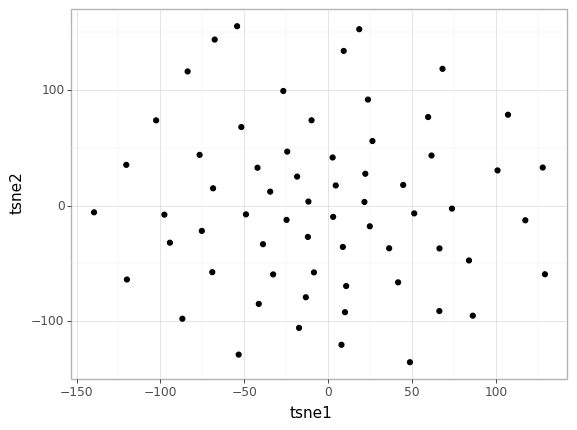

<ggplot: (8777354526113)>

In [21]:
(ggplot(lfc, aes(x='tsne1', y='tsne2'))+geom_point()+theme_light())

In [22]:
lfc.columns.name = None

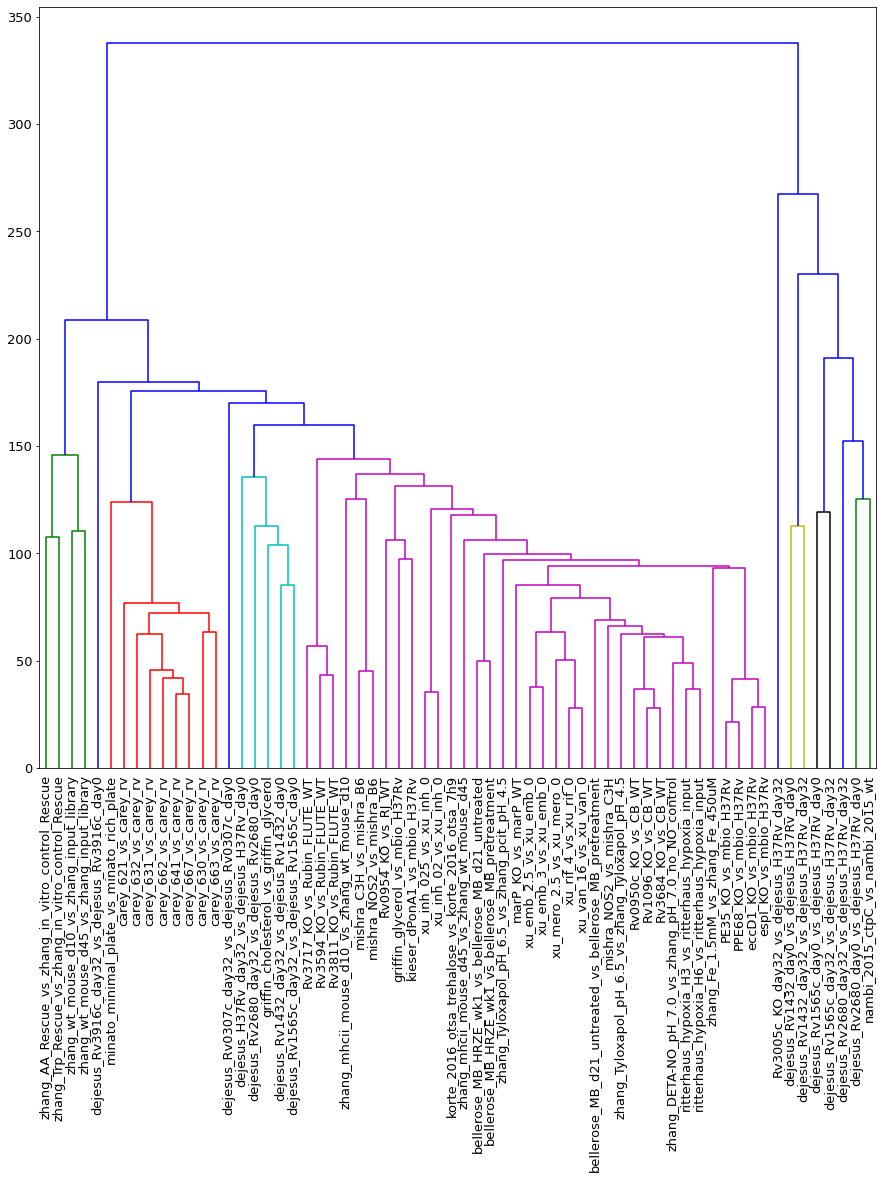

In [30]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 14))
ax = fig.add_subplot(1, 1, 1)
shc.dendrogram(shc.linkage(lfc[value_cols], method='ward'),  color_threshold=150,labels=lfc.index)
ax.tick_params(axis='x', which='major', labelsize=13)
ax.tick_params(axis='y', which='major', labelsize=13)
fig.savefig('dataset_dendrogram.jpg', bbox_inches = 'tight', dpi=500)


In [31]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(lfc[value_cols])

In [32]:
lfc['y_hc']=y_hc

In [34]:
lfc

,Rv0003,Rv0004,Rv0007,Rv0008c,Rv0009,Rv0010c,Rv0011c,Rv0012,Rv0016c,Rv0017c,...,Rv3921c,Rv3922c,Rv3923c,Rv3924c,pca1,pca2,pca3,tsne1,tsne2,y_hc
Dataset,,,,,,,,,,,,,,,,,,,,,
PE35_KO_vs_mbio_H37Rv,-0.03,-3.81,-0.44,-0.22,-0.13,-0.06,0.42,-0.24,0.09,-0.12,...,1.98,-0.88,-0.32,0,-4.760095,-2.369996,-1.630707,-18.546289,25.069319,1
PPE68_KO_vs_mbio_H37Rv,-0.08,-3.39,-0.14,-0,-0.12,0.07,0.56,-0.74,-0.25,-0.19,...,1.92,-0.37,0.1,0,-4.325169,-2.313324,-1.223063,-34.587902,12.047621,1
Rv0950c_KO_vs_CB_WT,0.03,-2.6,-0.47,0.43,-0.1,0.29,-1.6,0.29,-0.96,-0.65,...,0.25,-0.12,-1.75,0,-9.116154,0.404866,-1.930261,-11.813895,3.492279,1
Rv0954_KO_vs_RJ_WT,-1.2,-6.83,-1.21,-0.51,0.78,0.31,-6.75,-1.12,-4.57,-3.85,...,0.16,-0.82,3.01,0,-11.774741,4.011509,-6.554429,-139.580765,-5.831884,1
Rv1096_KO_vs_CB_WT,0.39,1.54,-0.34,0.58,0.11,0.26,-1.98,-1.12,-0.84,-0.38,...,0.87,0.47,0.28,0,-8.635184,-2.633574,0.812886,-12.126139,-27.120695,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,0.41,0,0,0.15,-0.24,-0.16,0,0.45,1.39,-1.39,...,0,-0.76,0,0,-6.047181,-8.812395,1.011661,-51.803810,67.932877,1
zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,1.3,0,-0.9,-0.26,0.26,0.09,0,1.3,-2.29,6.59,...,0,1.65,0,0,-10.719093,-32.728199,12.076852,48.694798,-135.474182,1
zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,-0.49,0.7,3.05,0.44,1.99,1.58,0,-0.17,2.39,1.99,...,0,-0.93,1.6,0,-0.084878,-16.324142,5.275078,-53.387859,-128.890701,1
